# **Chapter 5. 머신러닝(Machine Learning) 기초** 





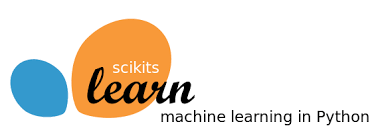


---
### **학습 목표**
> 5-1. 머신 러닝 개요 <br>
> 5-2. sklearn 이란? <br>
> 5-3. 전처리 기본 (정규화, 표준화, 범주형 데이터, 학습/테스트 세트 분할) <br>
> 5-4. 분류 분석 모델링 <br>
> 5-5. 분류 성능 평가하기 <br>
> 5-6. 회귀 분석 모델링 <br>
> 5-7. 회귀 성능 평가하기 <br>
> 5-8. 앙상블 모델링 <br>
> 5-9. 하이퍼파라미터(hyper-parameter) 튜닝 <br>
> **5-10. 비지도 군집화 분석**

## 5-10. 비지도 군집화 분석
> 이번 시간에는 대표적인 비지도(Unsupervised) 학습 방법론인 <br>
> **PCA 차원 축소 기법**과 **Kmeans, DBSCAN** 군집 분석 방법을 알아보겠습니다.


> #### 차원 축소란?
> - 차원 축소는 **변수가 매우 많은 데이터**의 경우, **원하는 차원만큼 축소**한 데이터로 변환하는 것을 의미합니다.
> - 일반적으로 **차원이 증가할 수록 데이터 간의 거리가 멀어져**, 머신 러닝 **모델의 성능이 떨어질 수 있습니다.**
> - 차원을 축소하면 연산량도 감소하게 되어서 **학습 속도**가 빨라집니다.
> - 3차원 이하로 축소할 경우, **데이터가 시각적으로도 해석**이 됩니다.
> - 차원 축소에서 중요한 포인트는 "**얼마나 원본 데이터의 특징을 잘 보존하면서 차원을 축소하느냐**" 입니다.
> - 대표적인 기법 : PCA(Principle Component Analysis), LDA(Latent Dirichlet Allocation)

> 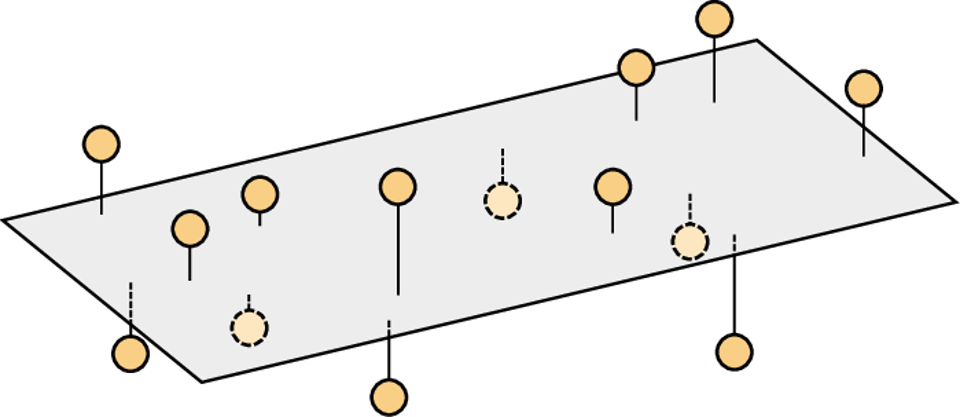

> #### 군집 분석이란?
> - 범주 구분에 대한 사전 정보가 없을 때, 데이터를 **유사한 성격**을 가진 여러개의 **그룹(군집) 으로 묶어주는 것**을 말합니다.
> - 군집 분석은 주로 **고객을 세분화** 하거나, **유사 제품, 지역 군을 묶는 등** 다양한 의사결정 분야에서 활용될 수 있습니다.
> - 군집 분석에서 중요한 포인트는 "**그룹의 특성이 잘 구분 될 수 있는 최적 군집 수 결정**" 입니다.
> - 대표적인 기법 : K-means, DBSCAN

> 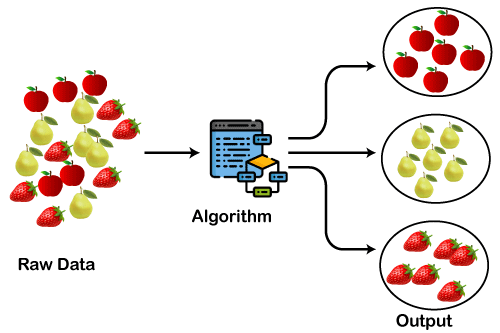

In [1]:
# 라이브러리 불러오기
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
# 실습 데이터 준비 (펭귄 데이터)
from sklearn.preprocessing import MinMaxScaler  # 라이브러리 로딩
from sklearn.preprocessing import LabelEncoder
penguins = sns.load_dataset("penguins")

# 결측값 제거
penguins = penguins.dropna().reset_index(drop=True)
scaler = MinMaxScaler() # 스케일러 정의
features = penguins[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]    # 정규화 대상 컬럼
features_normed = scaler.fit_transform(features)    # 정규화 

# 정규화 된 데이터로 바꿔주기
penguins = penguins.assign(bill_length_mm = features_normed[:,0],
                            bill_depth_mm = features_normed[:,1],
                            flipper_length_mm = features_normed[:,2],
                            body_mass_g = features_normed[:,3])

encoder = LabelEncoder() # 인코더 정의
features = penguins[['species', 'island', 'sex']]    # 인코딩 대상 컬럼
encoded = features.apply(encoder.fit_transform)    # 인코딩 실행 

# 수치형 데이터로 바꿔주기
penguins = penguins.assign(species = encoded['species'],
                            island = encoded['island'],
                            sex = encoded['sex'])
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,0.254545,0.666667,0.152542,0.291667,1
1,0,2,0.269091,0.511905,0.237288,0.305556,0
2,0,2,0.298182,0.583333,0.389831,0.152778,0
3,0,2,0.167273,0.738095,0.355932,0.208333,0
4,0,2,0.261818,0.892857,0.305085,0.263889,1
...,...,...,...,...,...,...,...
328,2,0,0.549091,0.071429,0.711864,0.618056,0
329,2,0,0.534545,0.142857,0.728814,0.597222,0
330,2,0,0.665455,0.309524,0.847458,0.847222,1
331,2,0,0.476364,0.202381,0.677966,0.694444,0


> ###  **5-10-1. 주성분 분석 (PCA)**
> -  주성분 분석 (Principle Component Analysis) 는 가장 대표적인 차원 축소 방법론 입니다.
> - **데이터의 특성을 잘 담고 있는 주성분들 (Principle Components) 로 자동 변환**해 줍니다.
> - 이때 **주성분 개수**가 **차원 수**가 됩니다.
> - **적절한 주성분 개수**를 선택하는 것이 중요합니다.
    - 주성분 개수가 너무 많으면 : 차원을 많이 줄이지 못함
    - 주성분 개수가 너무 적으면 : 데이터 정보가 손실됨
> - [PCA 분석 위키피디아](https://ko.wikipedia.org/wiki/%EC%A3%BC%EC%84%B1%EB%B6%84_%EB%B6%84%EC%84%9D)

> 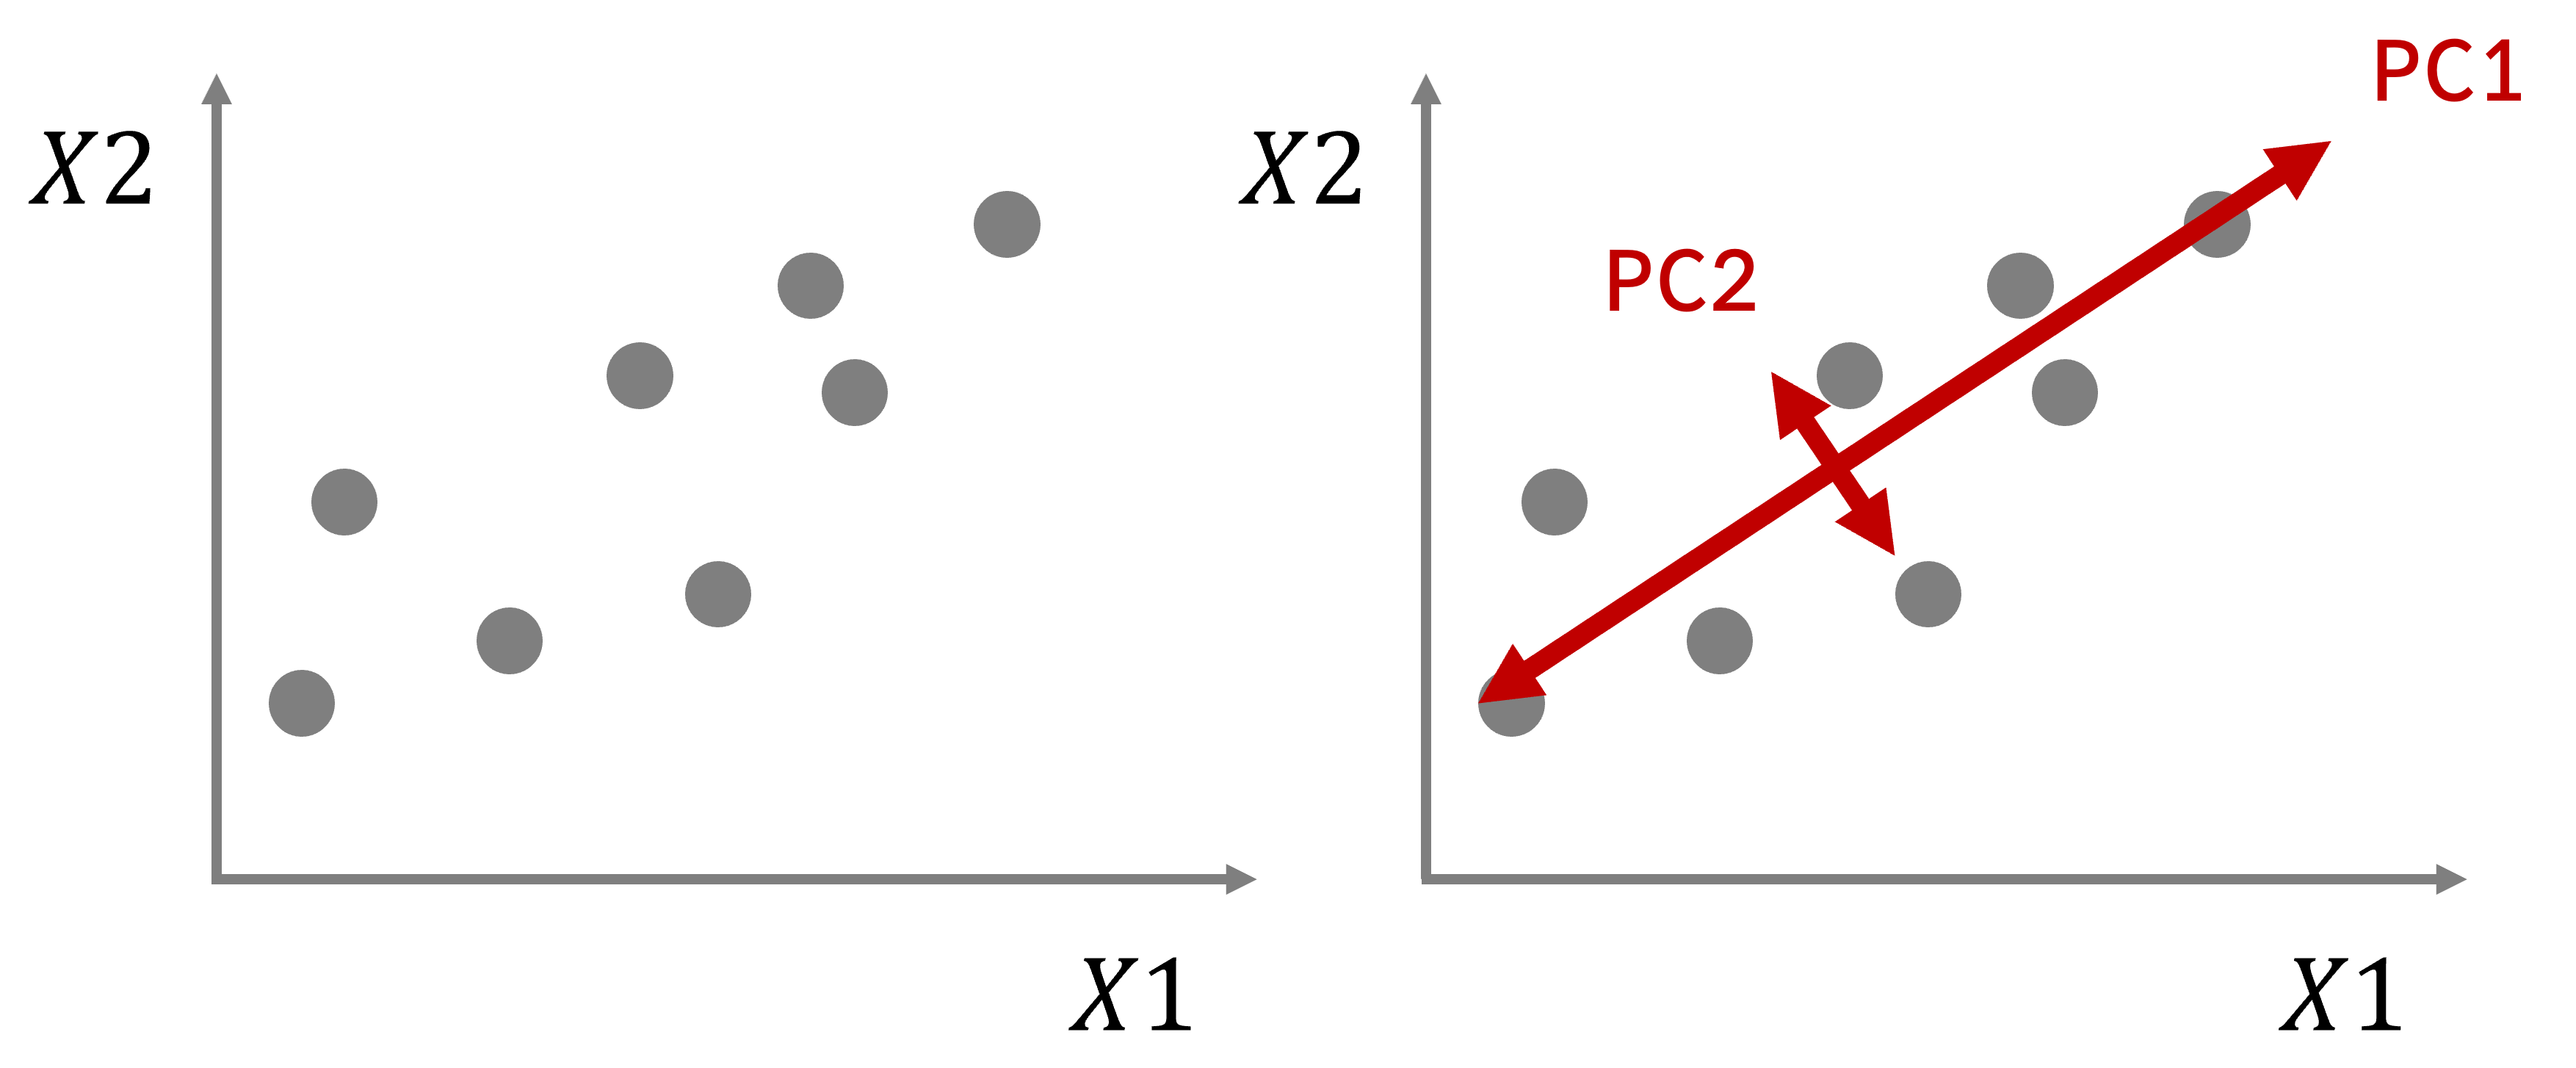

In [3]:
# 라이브러리 로딩
from sklearn.decomposition import PCA

In [4]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,0.254545,0.666667,0.152542,0.291667,1
1,0,2,0.269091,0.511905,0.237288,0.305556,0
2,0,2,0.298182,0.583333,0.389831,0.152778,0
3,0,2,0.167273,0.738095,0.355932,0.208333,0
4,0,2,0.261818,0.892857,0.305085,0.263889,1
...,...,...,...,...,...,...,...
328,2,0,0.549091,0.071429,0.711864,0.618056,0
329,2,0,0.534545,0.142857,0.728814,0.597222,0
330,2,0,0.665455,0.309524,0.847458,0.847222,1
331,2,0,0.476364,0.202381,0.677966,0.694444,0


> **2차원 축소**

In [5]:
# PCA 정의
pca = PCA(n_components=2)   # 주성분 개수

In [6]:
# PCA 실행 (2차원 축소)
pc = pca.fit_transform(penguins)
penguins_2D = pd.DataFrame(data=pc, columns=['PC1', 'PC2'])

In [7]:
penguins_2D

,PC1,PC2
0,1.566650,-0.599606
1,1.539781,0.340458
2,1.544056,0.331655
3,1.582201,0.318146
4,1.578545,-0.655283
...,...,...
328,-1.339470,0.523993
329,-1.326006,0.515039
330,-1.394341,-0.522119
331,-1.315528,0.502121


Text(0.5, 1.0, '2D Penguins Data')

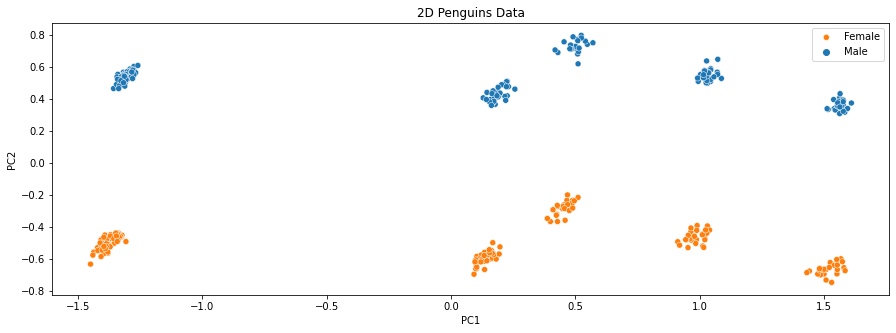

In [8]:
# PCA 시각화 (2차원 축소)
plt.figure(figsize=(15,5))
sns.scatterplot(x=penguins_2D['PC1'], y=penguins_2D['PC2'], hue=penguins['sex'])
plt.legend(labels=["Female", "Male"])
plt.title('2D Penguins Data')

> **3차원 축소**

In [9]:
# PCA 정의
pca = PCA(n_components=3)   # 주성분 개수

In [10]:
# PCA 실행 (3차원 축소)
pc = pca.fit_transform(penguins)
penguins_3D = pd.DataFrame(data=pc, columns=['PC1', 'PC2', 'PC3'])

In [11]:
penguins_3D

,PC1,PC2,PC3
0,1.566650,-0.599606,-0.468378
1,1.539781,0.340458,-0.696617
2,1.544056,0.331655,-0.705503
3,1.582201,0.318146,-0.676191
4,1.578545,-0.655283,-0.464096
...,...,...,...
328,-1.339470,0.523993,-0.188183
329,-1.326006,0.515039,-0.182203
330,-1.394341,-0.522119,0.010826
331,-1.315528,0.502121,-0.167670


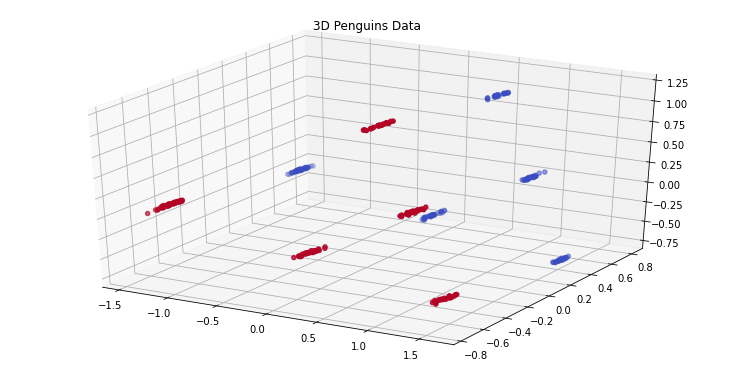

In [12]:
# PCA 시각화 (3차원 축소)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 5))
axes = Axes3D(fig)           # 3차원 axes 생성
axes.scatter3D(penguins_3D['PC1'], penguins_3D['PC2'], penguins_3D['PC3'], cmap='coolwarm', c=penguins['sex'])
plt.title('3D Penguins Data')
plt.show()

> ###  **5-10-2. Kmeans 군집 분석**
> - 주어진 **데이터를 K 개의 군집**으로 묶어주는 알고리즘
> - 유클리디안(Euclidean) **거리 기반**으로 데이터가 가까운지 계산합니다.
> - 알고리즘 작동 방식
    1. 임의의 K 개 랜덤 데이터 선택
    2. K개 군집에 각각 가까운 모든 데이터를 배정합니다.
    3. 군집의 중심점(Centroid) 계산 (K 개 중심점 생성)
    4. 중심점이 변하지 않을 때 까지 2번, 3번 반복
> - **최적 군집 수 결정 (Elbow Method)**
    - 군집 간 거리 합을 나타내는 'inertia' 지수가 급격히 떨어지는 지점을 보통 적정 군집 수로 사용합니다.

> 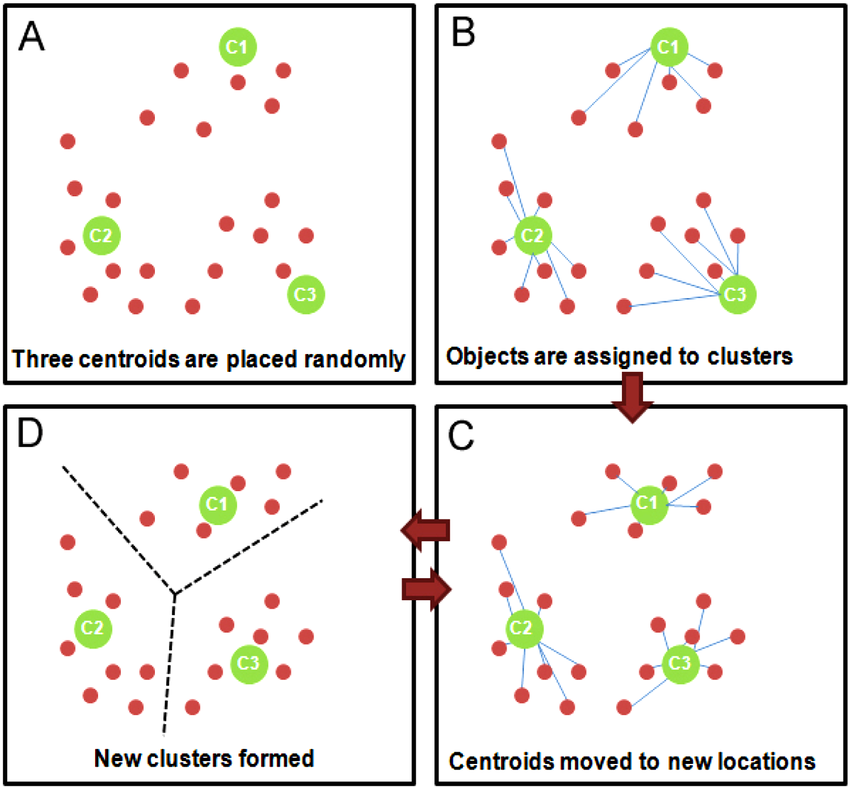

In [13]:
# 라이브러리 로딩
from sklearn.cluster import KMeans

In [14]:
# 최적 군집 수 결정
inertia_ls = []
k_range = range(2, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(penguins)
    inertia = kmeans.inertia_
    print('K : {} | inertia : {}'.format(k, inertia))
    inertia_ls.append(inertia)

K : 2 | inertia : 246.5557608937347
K : 3 | inertia : 181.20793576966238
K : 4 | inertia : 126.9974574803962
K : 5 | inertia : 97.75141039720992
K : 6 | inertia : 66.78240259692572
K : 7 | inertia : 48.106446896841504
K : 8 | inertia : 35.28446887109179
K : 9 | inertia : 22.945100715164017


Text(0.5, 0, 'Inertia')

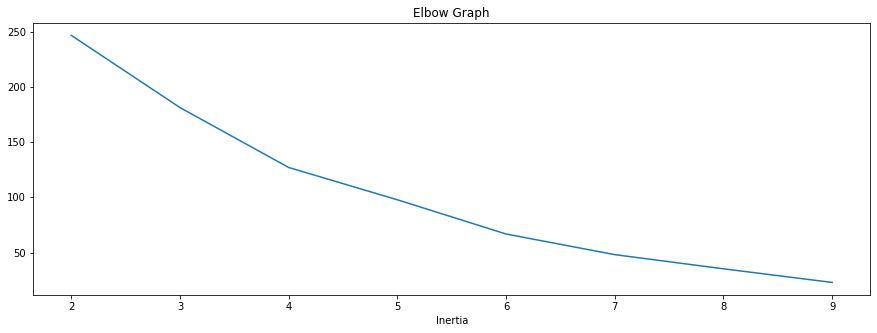

In [15]:
plt.figure(figsize=(15,5))
sns.lineplot(x=k_range, y=inertia_ls)
plt.title('Elbow Graph')
plt.xlabel('K')
plt.xlabel('Inertia')

In [16]:
# Kmeans 군집화 실행
kmeans = KMeans(n_clusters=3)
kmeans.fit(penguins)

KMeans(n_clusters=3)

In [17]:
# np.set_printoptions(threshold=np.inf)   # 전체 출력 옵션
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [18]:
# 군집 번호(label) 생성
penguins['kmeans_cluster'] = kmeans.labels_
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,kmeans_cluster
0,0,2,0.254545,0.666667,0.152542,0.291667,1,2
1,0,2,0.269091,0.511905,0.237288,0.305556,0,2
2,0,2,0.298182,0.583333,0.389831,0.152778,0,2
3,0,2,0.167273,0.738095,0.355932,0.208333,0,2
4,0,2,0.261818,0.892857,0.305085,0.263889,1,2
...,...,...,...,...,...,...,...,...
328,2,0,0.549091,0.071429,0.711864,0.618056,0,1
329,2,0,0.534545,0.142857,0.728814,0.597222,0,1
330,2,0,0.665455,0.309524,0.847458,0.847222,1,1
331,2,0,0.476364,0.202381,0.677966,0.694444,0,1


Text(0.5, 1.0, 'Kmeans Clustering Output')

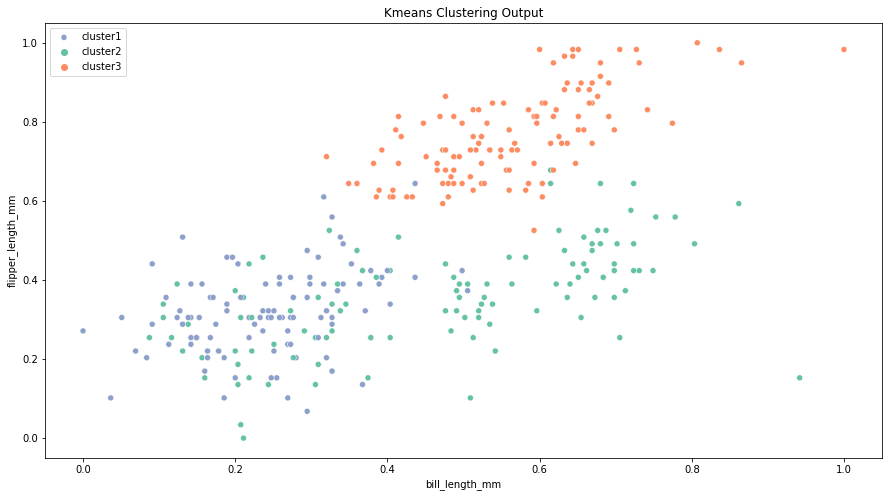

In [26]:
# 군집 결과 시각화
plt.figure(figsize=(15,8))
sns.scatterplot(x=penguins['bill_length_mm'], y=penguins['flipper_length_mm'], hue=penguins['kmeans_cluster'], palette='Set2')
plt.legend(labels=["cluster1", "cluster2", "cluster3"])
plt.title('Kmeans Clustering Output')

> ###  **5-10-3. DBSCAN 군집 분석**
> - DBSCAN(Density-based spatial clustering of applications with noise)
> - **밀도 기반** 군집화 알고리즘 입니다.
> - KMeans 는 군집 간 거리를 사용하는 방법이지만, 
> - DBSCAN은 밀도 기반이기 때문에, **높은 밀집성을 가진 부분끼리 군집**으로 묶어줍니다.
> - 알고리즘 작동 방식
    - 데이터를 기준으로 epilon 반경 내에 데이터가 있으면 같은 군집으로 간주 
    - 최소 포인트 개수 만큼 반경내에 없다면, 군집 경계선을 지정
> - **특징**
    - 군집 수를 미리 정할 필요가 없습니다
    - 형상이 균일하지 않은 모양의 군집도 잘 찾아냅니다. (비선형적 군집화)

> 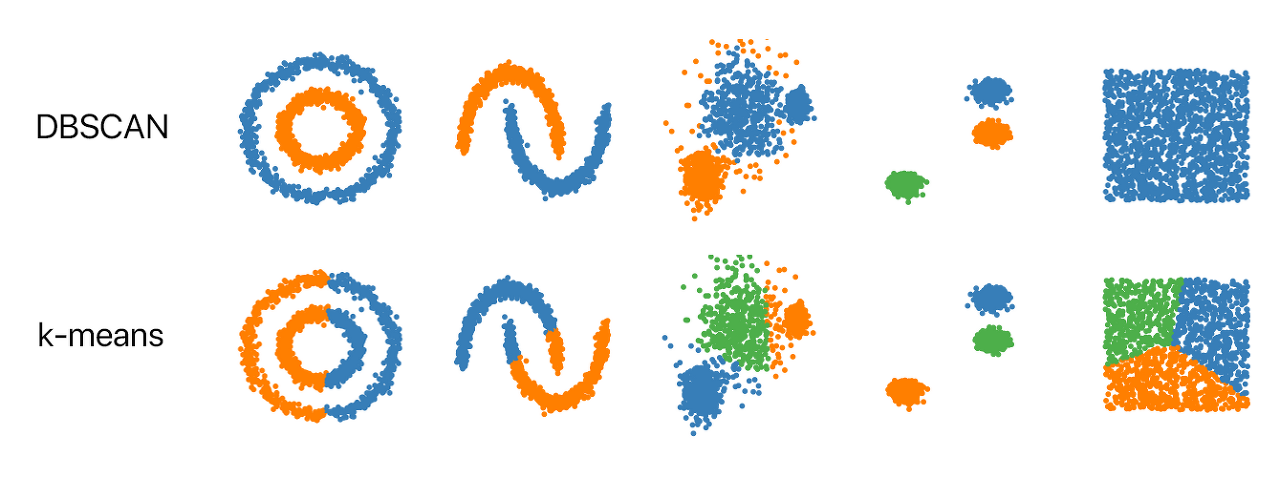

In [20]:
# 라이브러리 로딩
from sklearn.cluster import DBSCAN

In [21]:
# DBSCAN 군집화 실행
dbscan = DBSCAN(eps=0.5)
dbscan.fit(penguins)

DBSCAN()

In [22]:
# np.set_printoptions(threshold=np.inf)   # 전체 출력 옵션
dbscan.labels_

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 2, 3, 2, 3, 3, 2, 3,
       2, 2, 3, 4, 5, 4, 5, 4, 5, 5, 4, 4, 5, 4, 5, 4, 5, 4, 5, 5, 4, 5,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 4, 5, 5, 4, 5, 4, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 5, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 5, 4, 5, 5, 4, 4, 5, 4, 5, 6, 7, 7, 6, 7, 6, 6, 7,
       6, 7, 6, 7, 6, 7, 6, 7, 7, 6, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7, 6, 7,
       6, 7, 6, 7, 7, 6, 6, 7, 6, 7, 7, 6, 7, 6, 6, 7, 6, 7, 7, 6, 6, 7,
       6, 7, 6, 7, 6, 7, 7, 6, 7, 6, 6, 7, 6, 7, 7, 6, 8, 9, 8, 9, 9, 8,
       8, 9, 8, 9, 8, 9, 8, 9, 8, 9, 8, 9, 8, 9, 9, 8, 8, 9, 8, 9, 9, 8,
       9, 9, 8, 8, 9, 8, 9, 8, 9, 8, 9, 8, 9, 8, 9, 9, 8, 8, 9, 8, 9, 8,
       9, 8, 9, 8, 9, 8, 9, 8, 9, 8, 9, 8, 9, 8, 9, 9, 8, 9, 8, 9, 9, 8,
       8, 9, 8, 9, 8, 9, 8, 9, 8, 9, 8, 9, 8, 9, 8,

In [23]:
# 군집 번호(label) 생성
penguins['dbscan_cluster'] = dbscan.labels_
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,kmeans_cluster,dbscan_cluster
0,0,2,0.254545,0.666667,0.152542,0.291667,1,2,0
1,0,2,0.269091,0.511905,0.237288,0.305556,0,2,1
2,0,2,0.298182,0.583333,0.389831,0.152778,0,2,1
3,0,2,0.167273,0.738095,0.355932,0.208333,0,2,1
4,0,2,0.261818,0.892857,0.305085,0.263889,1,2,0
...,...,...,...,...,...,...,...,...,...
328,2,0,0.549091,0.071429,0.711864,0.618056,0,1,8
329,2,0,0.534545,0.142857,0.728814,0.597222,0,1,8
330,2,0,0.665455,0.309524,0.847458,0.847222,1,1,9
331,2,0,0.476364,0.202381,0.677966,0.694444,0,1,8


Text(0.5, 1.0, 'DBSCAN Clustering Output')

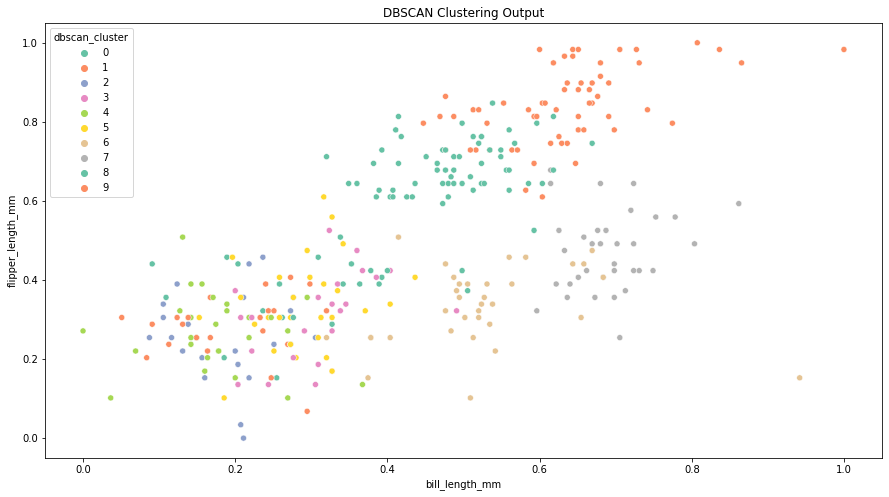

In [25]:
# 군집 결과 시각화
plt.figure(figsize=(15,8))
sns.scatterplot(x=penguins['bill_length_mm'], y=penguins['flipper_length_mm'], hue=penguins['dbscan_cluster'], palette='Set2')
plt.title('DBSCAN Clustering Output')